<a href="https://colab.research.google.com/github/tshadat2002/data_analytics_2/blob/main/Python/Unit4Assignments/train_test_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style='color:purple' align='center'>Training And Testing Available Data</h2>

<p><b>We have a dataset containing prices of used BMW cars. We are going to analyze this dataset
and build a prediction function that can predict a price by taking mileage and age of the car
as input. We will use sklearn train_test_split method to split training and testing dataset</b></p>

In [1]:
import pandas as pd
from google.colab import files
data_to_load = files.upload()


In [4]:
import pandas as pd
#df = pd.read_csv("https://github.com/codebasics/py/blob/21a0f1001e03c9c58b96009fba738001c8422d3f/ML/6_train_test_split/carprices.csv")
import io

df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/21a0f1001e03c9c58b96009fba738001c8422d3f/ML/6_train_test_split/carprices.csv")

df.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


In [5]:
df.shape

(20, 3)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

**Car Mileage Vs Sell Price ($)**

Text(0, 0.5, 'Sell Price($)')

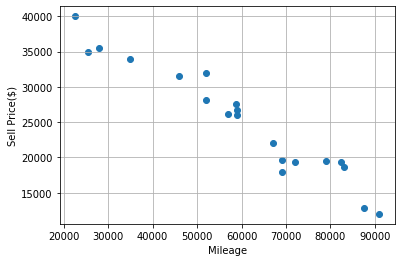

In [12]:
plt.scatter(df['Mileage'],df['Sell Price($)'])
plt.grid()
plt.xlabel("Mileage")
plt.ylabel("Sell Price($)")


**Car Age Vs Sell Price ($)**

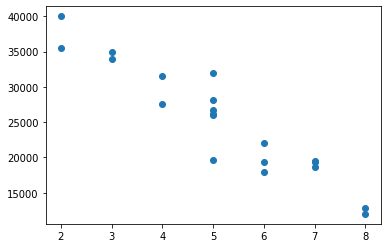

In [13]:
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])


**Looking at above two scatter plots, using linear regression model makes sense as we can clearly see a linear relationship between our dependant (i.e. Sell Price) and independant variables (i.e. car age and car mileage)**

<p style='color:purple'><b>The approach we are going to use here is to split available data in two sets</b></p>
    <ol>
        <b>
        <li>Training: We will train our model on this dataset</li>
        <li>Testing: We will use this subset to make actual predictions using trained model</li>
        </b>
     </ol>
<p style='color:purple'><b>The reason we don't use same training set for testing is because our model has seen those samples before, using same samples for making predictions might give us wrong impression about accuracy of our model. It is like you ask same questions in exam paper as you tought the students in the class.
</b></p>

In [14]:
X = df[['Mileage','Age(yrs)']]#independent input

In [15]:
y = df['Sell Price($)']# dependable variable

In [20]:
from sklearn.model_selection import train_test_split #train test library for ML
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101) #we can addd after 0.3,random_state=101
# in this case test values will not be randomized

In [17]:
X_train
#70%

,Mileage,Age(yrs)
14,82450,7
18,87600,8
0,69000,6
5,59000,5
12,59000,5
4,46000,4
8,91000,8
13,58780,4
9,67000,6
15,25400,3


In [19]:
X_test
#30%

,Mileage,Age(yrs)
3,22500,2
7,72000,6
2,57000,5
1,35000,3
10,83000,7
16,28000,2


In [21]:
y_train

14    19400
18    12800
0     18000
5     26750
12    26000
4     31500
8     12000
13    27500
9     22000
15    35000
19    28200
6     32000
17    19700
11    19500
Name: Sell Price($), dtype: int64

In [22]:
y_test

3     40000
7     19300
2     26100
1     34000
10    18700
16    35500
Name: Sell Price($), dtype: int64

**Lets run linear regression model now**

In [24]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
X_test

,Mileage,Age(yrs)
3,22500,2
7,72000,6
2,57000,5
1,35000,3
10,83000,7
16,28000,2


In [26]:
t=clf.predict(X_test)

In [27]:
y_test

3     40000
7     19300
2     26100
1     34000
10    18700
16    35500
Name: Sell Price($), dtype: int64

In [28]:
clf.score(X_test, y_test)

0.9683656768317045

**random_state argument**

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)
X_test

,Mileage,Age(yrs)
7,72000,6
10,83000,7
5,59000,5
6,52000,5
3,22500,2
18,87600,8


Class exersice ,Can you fit a line on Car Mileage Vs Sell Price ($) grapf using the following example?

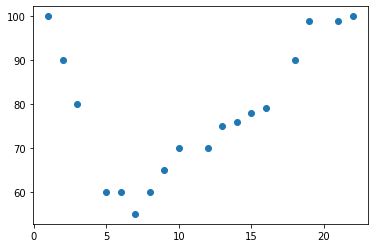

In [30]:
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt.scatter(x, y)
plt.show()

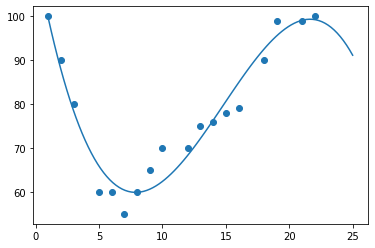

In [35]:
import numpy
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))# change value of 3 to 1 and 2 see what happens (one is strieaght line ,2 to the power of 2...polynomial)

myline = numpy.linspace(1, 25, 100) #change value of 22 to 25 17 see what happens

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()